In [1]:
!which python

/mnt/home/moham147/experiments/manifold-learning/.venv/bin/python


# Datasets

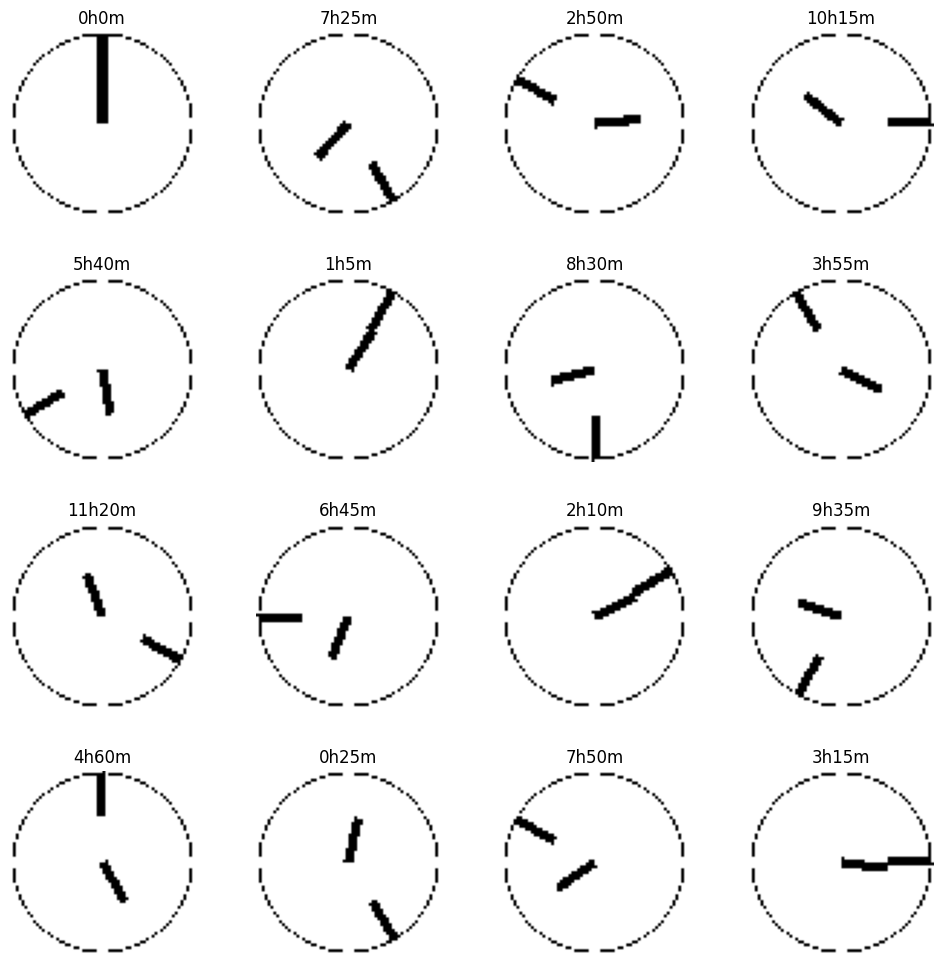

In [5]:
import torch
from torch.utils.data import DataLoader
from datasets.clock import ClockConfig, ClockDataset
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

IMG_SIZE = 64
BATCH_SIZE = 64
data_size = 4096

data_config = ClockConfig(
    minute_hand_len=1,
    minute_hand_start=0.5,
    miute_hand_thickness=0.1,
    hour_hand_len=0.5,
    hour_hand_start=0,
    hour_hand_thickness=0.1
)

dataset = ClockDataset(len=data_size, img_size=IMG_SIZE, augment=False, supervised=True, config=data_config)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

# visualize 16 images
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
fig.tight_layout()
batch, labels2d, _ = next(iter(dataloader))
for i in range(16):
    img = batch[i].unsqueeze(0)
    label = labels2d[i].numpy()
    hour = label[0] * 12
    minute = label[1] * 60
    axs[i // 4, i % 4].imshow(img[0].squeeze(), cmap='gray')
    axs[i // 4, i % 4].set_title(f"{hour:.0f}h{minute:.0f}m")
    axs[i // 4, i % 4].axis('off')


plt.show()

dataloder efficiency

In [6]:
# from tqdm import tqdm

# dataset = ClockDataset(len=data_size, img_size=IMG_SIZE, augment=False, supervised=True, config=data_config)
# dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

# for i, b in tqdm(enumerate(dataloader), total=len(dataloader)):
#     pass

# Models

In [10]:
from models import ClockDecoder, ConvInrAutoencoder, ResnetAutoencoder, ConvResidualDecoderBlock
import torch

torch.cuda.empty_cache()

model = ClockDecoder(img_size=IMG_SIZE, latent_dim=2, device=device).to(device)
img, labels2d, _ = next(iter(dataloader))
labels2d = labels2d.to(device)

y = model(labels2d)
y.shape

out = y.view(BATCH_SIZE, IMG_SIZE, IMG_SIZE, -1).permute(0, 3, 1, 2)  # Reshape to (B, C, H, W)
out.shape

torch.Size([64, 1, 64, 64])

In [ ]:
# forward pass
for i in range(10):
    img = torch.randn(16, 1, IMG_SIZE, IMG_SIZE)
    y = model(img)


In [4]:
from models import ResnetAutoencoder, ResnetAutoencoder
from torch import nn

cls = ResnetAutoencoder

ae = cls(img_size=256, latent_dim=2)


def print_model_parameters(model: nn.Module):
    print(f"{'Layer':<40}{'Param Count':>15}")
    print("-" * 60)
    total_params = 0
    
    for name, param in model.named_parameters():
        if param.requires_grad:
            param_count = param.numel()
            total_params += param_count
            print(f"{name:<40}{param_count:>15}")
    
    print("-" * 60)
    print(f"{'Total Trainable Parameters':<40}{total_params:>15}")

# count params
print_model_parameters(ae)


Layer                                       Param Count
------------------------------------------------------------
encoder.encoder.0.weight                           2304
encoder.encoder.0.bias                              256
encoder.encoder.1.downsample.0.bias                 128
encoder.encoder.1.downsample.0.weight_orig         294912
encoder.encoder.1.downsample.1.weight               128
encoder.encoder.1.downsample.1.bias                 128
encoder.encoder.1.downsample.4.bias                 128
encoder.encoder.1.downsample.4.weight_orig         147456
encoder.encoder.1.downsample.5.weight               128
encoder.encoder.1.downsample.5.bias                 128
encoder.encoder.1.skip.0.bias                       128
encoder.encoder.1.skip.0.weight_orig              32768
encoder.encoder.3.downsample.0.bias                  64
encoder.encoder.3.downsample.0.weight_orig          73728
encoder.encoder.3.downsample.1.weight                64
encoder.encoder.3.downsample.1.bias  

Number of parameters: 12249699


In [5]:
import torch
print(f"Allocated: {torch.cuda.memory_allocated()} bytes")
print(f"Cached: {torch.cuda.memory_reserved()} bytes")


Allocated: 0 bytes
Cached: 0 bytes


In [3]:
import os
from datasets.clock import ClockDataset, ClockConfig
import torch
from torch.utils.data import DataLoader
from config import MODELS_DIR

LATENT_DIM = 2

def load_model_and_dataset(
    img_size=128,
    batch_size=64,
    data_size=2048,
    latent_dim=2,
    postfix='',
    tag='model',
    data_config=None
):
    """
    Load the model and dataset for inference.
    """
    # Load dataset
    dataset = ClockDataset(len=data_size, img_size=img_size, augment=False, config=data_config)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Load trained model
    model_file = f"{latent_dim}-i{img_size}{postfix}.pt"
    model_path = os.path.join(MODELS_DIR, tag, model_file)
    
    model = torch.jit.load(model_path).to(device)
    
    return model, dataloader

data_config = ClockConfig(
    minute_hand_len=1,
    minute_hand_start=0.5,
    miute_hand_thickness=0.1,
    hour_hand_len=0.5,
    hour_hand_start=0,
    hour_hand_thickness=0.1
)



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Decoder

In [4]:

data_config = ClockConfig(
    minute_hand_len=1,
    minute_hand_start=0.5,
    miute_hand_thickness=0.1,
    hour_hand_len=0.5,
    hour_hand_start=0,
    hour_hand_thickness=0.1
)

model, dataloader = load_model_and_dataset(
    img_size=64,
    batch_size=64,
    data_config=data_config,
    latent_dim=LATENT_DIM,
    tag='ClockDecoder',
    postfix='-d21',
)

data_iter = iter(dataloader)


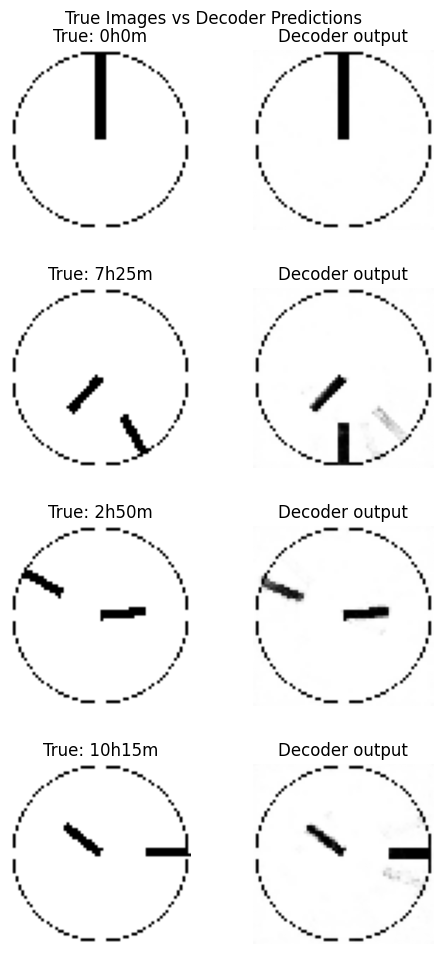

In [ ]:
# visualize 4 images, with the true image on the left and the decoder's predictions on the right
fig, axs = plt.subplots(4, 2, figsize=(5, 10))
fig.suptitle("True Images vs Decoder Predictions")
fig.tight_layout()
batch, labels2d, _ = next(data_iter)
for i in range(4):
  label = labels2d[i].numpy()
  hour = label[0] * 12
  minute = label[1] * 60
  
  predicted_img = model(labels2d[i].unsqueeze(0).to(device)).detach().cpu()
  
  axs[i, 0].imshow(batch[i].squeeze(), cmap='gray')
  axs[i, 0].set_title(f"True: {hour:.0f}h{minute:.0f}m")
  axs[i, 0].axis('off')
  
  axs[i, 1].imshow(predicted_img.squeeze(), cmap='gray')
  axs[i, 1].set_title("Decoder output")
  axs[i, 1].axis('off')

plt.show()


## Visualize AE latents

  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:01<00:00, 23.06it/s]


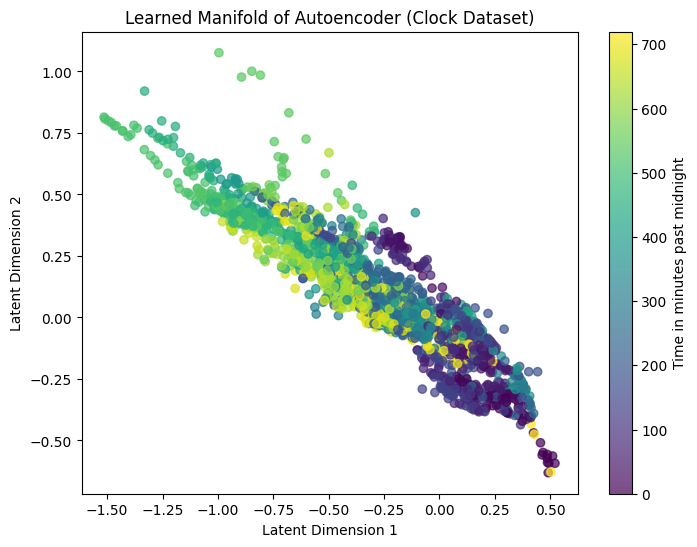

In [15]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from tqdm import tqdm

torch.cuda.empty_cache()

model, dataloader = load_model_and_dataset(
    img_size=64,
    data_config=data_config,
    latent_dim=LATENT_DIM,
    tag='ResnetAutoencoder',
    postfix='-d22',
)

# Extract latent representations
latents = []
labels = []
labels2d = []

for batch, label2d, label1d in tqdm(dataloader):
    batch = batch.to(device)
    with torch.no_grad():
        _, latent = model.forward(batch)
    latents.append(latent.cpu().numpy())
    labels.append(label1d.numpy())
    labels2d.append(label2d.numpy())

latents = np.concatenate(latents, axis=0)
labels = np.concatenate(labels, axis=0) * (12 * 60)  # Denormalize to minutes past midnight
labels2d = np.concatenate(labels2d, axis=0)  # Denormalize to minutes past midnight

if (LATENT_DIM <= 2):
  # Plot latent space
  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(latents[:, 0], labels if LATENT_DIM==1 else latents[:,1], c=labels, cmap="viridis", alpha=0.7)
  plt.colorbar(scatter, label="Time in minutes past midnight")
  plt.xlabel("Latent Dimension 1")
  plt.ylabel("Time in minutes past midnight" if LATENT_DIM==1 else "Latent Dimension 2")
  plt.title("Learned Manifold of Autoencoder (Clock Dataset)")
  plt.show()
else:
  # PCA for dimensionality reduction
  pca = PCA(n_components=2)
  latents_2d = pca.fit_transform(latents)

  # Plot PCA-reduced latent space
  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(latents_2d[:, 0], latents_2d[:, 1], c=labels, cmap="viridis", alpha=0.7)
  plt.colorbar(scatter, label="Time in minutes past midnight")
  plt.xlabel("PCA Component 1")
  plt.ylabel("PCA Component 2")
  
  plt.title("Learned Manifold of Autoencoder (Clock Dataset)")
  plt.show()
  

## Visualize reconstruction

In [16]:
i = iter(dataloader)

torch.Size([1, 1, 64, 64])


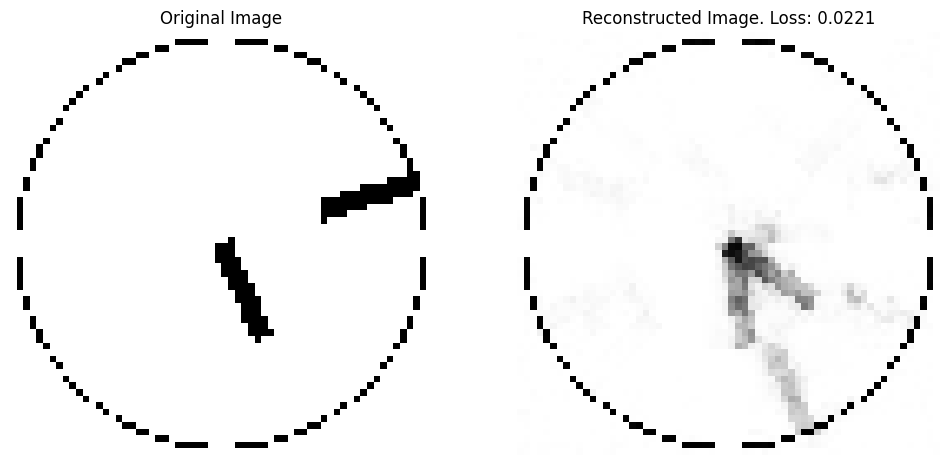

In [25]:
import matplotlib.pyplot as plt
import numpy as np


img = next(i)[0][0].unsqueeze(0)

print(img.shape)

out, latent = model.forward(img.to(device))

loss = torch.nn.functional.mse_loss(out, img.to(device))
img = img.squeeze(1).detach().cpu().numpy()
out = out.squeeze(1).detach().cpu().numpy()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img[0], cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(out[0], cmap='gray')
plt.title(f"Reconstructed Image. Loss: {loss.item():.4f}")
plt.axis('off')

plt.show()


In [11]:
from hooks.activation_norm import analyze_model_activations
from datasets.clock import ClockConfig

# Run the analysis
activation_norms = analyze_model_activations(model, dataloader, num_batches=10)

In [17]:
activation_norms

defaultdict(list, {})

# Visualize Regressor latents

In [73]:
import torch
from config import MODELS_DIR
import numpy as np
import matplotlib.pyplot as plt

torch.set_default_device('cpu')

model, dataloader = load_model_and_dataset(
    img_size=64,
    data_config=data_config,
    latent_dim=LATENT_DIM,
    tag='MultiHeadRegressor',
    postfix='-d22',
)

imgs = []
labels1d = []
labels2d = []
predicted_labels2d = []

with torch.no_grad():
  for images, label2d, label1d in dataloader:
    images = images.to(device)
    out = model.forward(images).cpu()
    
    label2d = (label2d * torch.tensor([12, 60]).float())
    predicted_label2d = (out * torch.tensor([12, 60]).float())
    
    imgs.append(images.cpu().numpy())
    labels1d.append(label1d.numpy())
    labels2d.append(label2d.numpy())
    predicted_labels2d.append(predicted_label2d)
    


predicted_labels2d = np.concatenate(predicted_labels2d, axis=0)
labels1d = np.concatenate(labels1d, axis=0)  # Denormalize to minutes past midnight
labels2d = np.concatenate(labels2d, axis=0)
imgs = np.concatenate(imgs, axis=0)


Text(0, 0.5, 'Minute')

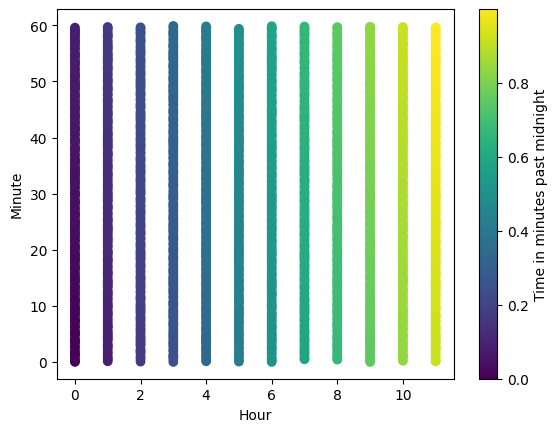

In [74]:
plt.scatter(labels2d[:, 0], labels2d[:, 1], c=labels1d, label='True Labels')
plt.colorbar(label='Time in minutes past midnight')
plt.xlabel('Hour')
plt.ylabel('Minute')

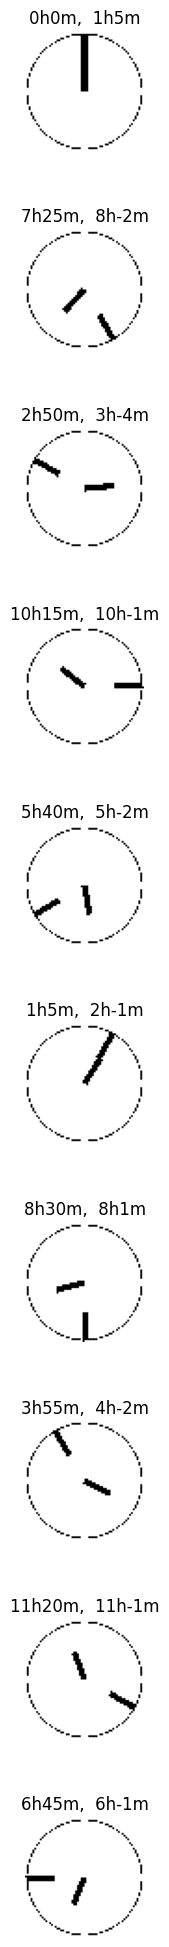

In [ ]:
# # Visualize the predictions
# n=10
# fig, axs = plt.subplots(n, 1, figsize=(2, 2*n))
# fig.tight_layout()

# for i in range(n):
#   img = imgs[i].squeeze()
#   label = labels2d[i]
#   predicted_label = predicted_labels2d[i]
  
#   axs[i].imshow(img, cmap='gray')
#   axs[i].set_title(f"{label[0]:.0f}h{label[1]:.0f}m,  {predicted_label[0]:.0f}h{predicted_label[1]:.0f}m")
#   axs[i].axis('off')


Text(0.5, 0, 'Hour')

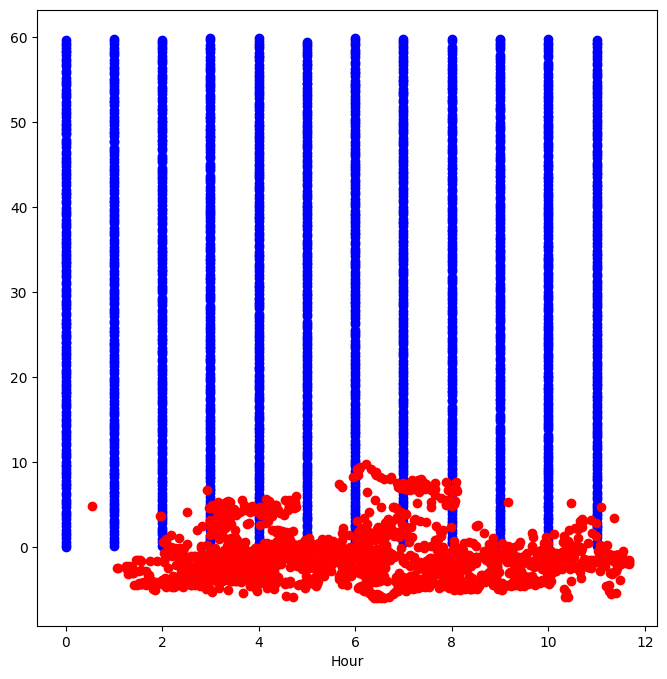

In [81]:
# matrix of true vs predicted

plt.figure(figsize=(8, 8))
plt.scatter(labels2d[:, 0], labels2d[:, 1], c='b', label='True Labels')
plt.scatter(predicted_labels2d[:, 0], predicted_labels2d[:, 1], c='r', label='Predicted Labels')


## Attempt to predict labels using heads

Head differentiation: head1 predicts label0, head2 predicts label1.

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# try to predict first or second label using head1 and head2
# Predict first label using head1
def fit_mlp(feat_idx, x):
  y = labels[:, feat_idx]
  x_train, x_test, y_train, y_test = train_test_split(feats_head1, y, test_size=0.2, random_state=42)
  model = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)

  print(f"Mean Squared Error (Head 1): {mse}")

fit_mlp(0, feats_head1)
fit_mlp(1, feats_head1)
fit_mlp(0, feats_head2)
fit_mlp(1, feats_head2)


Mean Squared Error (Head 1): 988.7281494140625


/mnt/home/moham147/experiments/manifold-learning/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error (Head 1): 3669.49951171875
Mean Squared Error (Head 1): 879.5015869140625
Mean Squared Error (Head 1): 3783.881591796875


/mnt/home/moham147/experiments/manifold-learning/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# UMAP

(2048,)

In [ ]:
# Do umap on the 

import umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from datasets.clock import IMG_SIZE, ClockDataset

BATCH_SIZE = 16
dataset = ClockDataset(len=data_size, img_size=IMG_SIZE, augment=False)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

# Sample the first 5000 data points
subset_size = 5000
subset_indices = np.random.choice(len(dataset), size=subset_size, replace=False)